In [61]:
!python get_sequence_peaks.py

In [62]:
!python GC_match_background.py

/Users/adorman/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/adorman/Documents/master-thesis/src/GC_match_background.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rand_start = [int(x) for x in rand_start]


In [47]:
import pickle 
with open('../results/peaks_seq.pkl', 'rb') as file:
    peaks = pickle.load(file)

peaks

,chr,start,end,middle_peak,sequence
peaksID,,,,,
1:12768-13635,1,12768,13635,13202,AACTTAATACCACAACCAGGCATAGGGGAAAGATTGGAGGAAAGAT...
1:14154-15100,1,14154,15100,14627,TGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGC...
1:15698-16677,1,15698,16677,16188,CAAGGCCACTGTGTTTCCCAGTTAGCTCAGAGCCTCAGTCGATCCC...
1:17116-17963,1,17116,17963,17540,ATATTTGAAATGGAAACTATTCAAAAAATTGAGAATTTCTGACCAC...
1:28903-29812,1,28903,29812,29358,CAATTATCTTTTGAAAAGCCTGTAGTTGCTCATCTGAAGAAGTGAC...
...,...,...,...,...,...
Y:56830668-56831266,Y,56830668,56831266,56830967,ACAATCTCAGCTCACATTTCATTTCACCATTCCATTCCATTCCACT...
Y:56833886-56834698,Y,56833886,56834698,56834292,CACTCCACTCCTTTCCATTCCATTCCACTCCACTCCATTCCACTCC...
Y:56836309-56837316,Y,56836309,56837316,56836812,TTTCACCATTTCATTCCATTCCATTCCACTGCATTCCATTCCATTC...


In [63]:
with open('../results/match_GC.pkl', 'rb') as file:
    peaks = pickle.load(file)

peaks

,chr,start,sequence
0,chr1,190585416.0,TGCCAGCATCTGTTATGTATTTTTGTCTTTTTAACACAATCGGAAA...
1,chr1,190681965.0,CAAAAAATTGCAACAGGCAGAGCTGTAAGAAGAATAAGTCAGTACA...
2,chr1,83253406.0,ATATCAATCTTTTTAATTTCTTAACACACTTGAAAAGTTTATGATA...
3,chr1,187975470.0,CTCCTTTGAATATATAATCATAAATGTGTCTTTTCCACATGACCTC...
4,chr1,232066673.0,AGATCTGGTGGCATGTGCCTGTAATCCCAGCTTCTCAGGAGGCTGA...
...,...,...,...
649,chr1,247116867.0,ACGGGGAGGGGGCGTGTCCCTGTGGGAGGGTGACAGCAAGGTCATC...
650,chr1,1211299.0,CCATGCCACAGGTGTGCAGCCCACAGTGCCGGTCGGAGACTCCCGT...
651,chr1,240091759.0,CGCGCGGGGGCAGAGGGGGCGGCGGCGGCGGGCGGGGAGCCAGGCC...
652,chr1,243849270.0,GCCAAACCCAGCATCTTCCGCACATTTCTATTCTTAGCACACAACT...


# Distribution peak length

953.1821498596458
3765
939.0
(1338,)


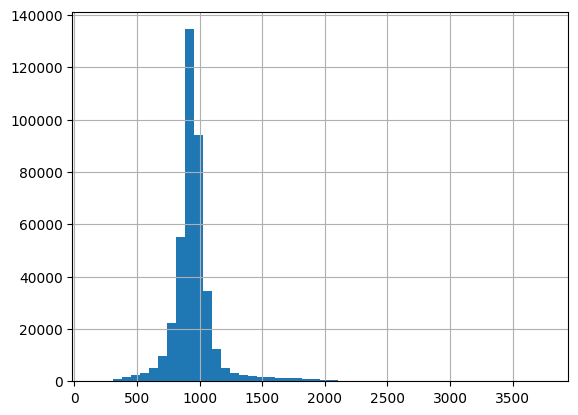

In [53]:
len_peak = peaks.end - peaks.start 
print(len_peak.mean())

len_peak.hist(bins=50)

print(len_peak.max())
print(len_peak.median())
print(len_peak[len_peak > 2000].shape)


# Distribution GC content

<Axes: >

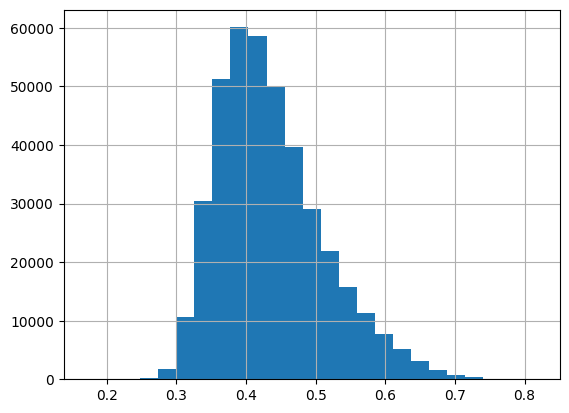

In [52]:
from utils_data_preprocessing import compute_GC_content

peaks['GC_cont'] = compute_GC_content(peaks.sequence)
peaks.GC_cont.hist(bins=25)

# Distribution coverage

In [54]:
coverage = []
with open("../results/coverage_by_pseudo_bulk.txt", "r") as grilled_cheese:
	coverage = grilled_cheese.read().splitlines()


In [56]:
import pandas as pd

def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

coverage = np.array(coverage)
cov_value = coverage[[is_float(x) for x in coverage]]
names = coverage[np.logical_not([is_float(x) for x in coverage])]

coverage = pd.DataFrame({"name": names[:-1], "coverage": cov_value})
coverage.name = coverage.name.str.removeprefix("../results/bam_cell_type/").str.removesuffix(".bam")
coverage

,name,coverage
0,D8_1/Neuroblast,0.00061318
1,D8_1/Somite,8.95754
2,D8_1/Neuronal,0.309335
3,D8_1/Myogenic,0.160304
4,D8_1/Mesenchymal,0.63683
5,D8_2/Somite,10.3794
6,D8_2/Neuronal,0.264931
7,D8_2/Myogenic,0.152165
8,D8_2/Mesenchymal,0.533022
9,D12_1/Neuroblast,0.202706


In [66]:
with open('../results/ATAC/D8_1/Somite.pkl', 'rb') as file:
    ATAC = pickle.load(file)

ATAC

peakID
1:12768-13635          [1.2189102178781874, 1.226369888734235, 1.2342...
1:14154-15100          [0.100332573013841, 0.10219749072785293, 0.104...
1:15698-16677          [3.221085875641379, 3.2192209579273667, 3.2173...
1:17116-17963          [2.92232605785667, 2.9100176009441916, 2.89770...
1:28903-29812          [21.48608996667407, 21.580827786545875, 21.688...
                                             ...                        
Y:56830668-56831266    [1.5490006532582963, 1.5508655709723083, 1.552...
Y:56833886-56834698    [3.907748577940566, 3.9017808412557278, 3.8954...
Y:56836309-56837316    [1.557579274742751, 1.564292978513194, 1.56988...
Y:56842040-56842368    [0.5173281738669051, 0.5184471244953123, 0.519...
Y:56850430-56851314    [1.466944273841772, 1.471793059898203, 1.47552...
Length: 399347, dtype: object

In [75]:
ATAC.sample(10)

peakID
X:10900704-10901627      [0.023870946739352507, 0.023870946739352507, 0...
1:156177651-156178551    [1.3684766185419428, 1.3699685527131524, 1.371...
5:19892885-19893802      [1.5221458381765245, 1.5217728546337224, 1.521...
8:18539400-18540385      [0.5053927004972288, 0.5024088321548097, 0.499...
6:2976342-2977342        [0.5930438330557888, 0.5949087507698008, 0.596...
8:63627552-63628475      [0.21073570168334632, 0.21260061939735825, 0.2...
2:96762496-96763437      [1.5363192128030152, 1.5404220317738415, 1.544...
2:233816312-233817346    [0.288316278586242, 0.2913001469286611, 0.2942...
1:85311495-85312556      [0.39760045662734017, 0.401330292055364, 0.405...
17:82450324-82451250     [4.000248496555557, 4.018897673695676, 4.03754...
dtype: object

In [69]:
!python GC_bins_genome.py

/Users/adorman/Documents/master-thesis/src/GC_bins_genome.py:48: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  back_regions = pd.read_csv("../results/background_regions.bed", sep='\t', header=None)


In [66]:
!bedtools intersect -a ../results/background_regions.bed -b ../results/common_peaks.bed -v > ../results/background_regions2.bed

In [67]:
!bedtools intersect -a ../results/background_regions2.bed -b ../data/hg38_blacklist.bed -v > ../results/background_regions.bed

In [70]:
with open('../results/background_GC.pkl', 'rb') as file:
    back = pickle.load(file)
back

,chr,start,end,sequence,GC_cont
ID,,,,,
1:18000-20114,1,18000,20114,TGAAGATGGAGCCATATTCCTGCAGGCGCCCTGGAGCAGGGTACTT...,0.577578
1:19000-21114,1,19000,21114,TGCATCTCATGGAACGCCATTTCCCCAGACATCCCTGTGGCTGGCT...,0.539262
1:20000-22114,1,20000,22114,CCTGGTGCTCCCACAAAGGAGAAGGGCTGATCACTCAAAGTTGCGA...,0.542573
1:21000-23114,1,21000,23114,CCGGGCTGTGCTGGGGCCTGAGCCGGGTGGTGGGGAGAGAGTCTCT...,0.560076
1:22000-24114,1,22000,24114,TTCCCTTGGGGAATCCATCTCTCTCGCAGGCTTAGTCCCAGAGCTT...,0.525071
...,...,...,...,...,...
Y:57211000-57213114,Y,57211000,57213114,GCCATAGTGAAGCTTTCCTCTCTAAGCTCACCCAGCCCAAACTGTG...,0.584674
Y:57212000-57214114,Y,57212000,57214114,GGAACCAGCACTGTGTGGAGACCAGCTTCAAGGAGCGGAAGGCTGG...,0.578051
Y:57213000-57215114,Y,57213000,57215114,TGTAGCAGGATCCCTGCAGATCAGGCCCATGACAAACACCGTCTCC...,0.546831


In [99]:
import os
import pickle 
import anndata
import numpy as np
import pandas as pd
import pyfaidx
import matplotlib.pyplot as plt

from utils_data_preprocessing import compute_GC_content

len_seq = 2114
path_genome = '../data/hg38.fa' 

#Get matched GC content background sequence
#--------------------------------------------
with open('../results/peaks_seq.pkl', 'rb') as file:
    peaks = pickle.load(file)

with open('../results/background_GC.pkl', 'rb') as file:
    locations = pickle.load(file)

#Shuffle genomic sequence
locations = locations.sample(frac=1)

#Compute GC content
peaks['GC_cont'] = compute_GC_content(peaks.sequence)

#Round GC_content to tolerance for two sequences to be matched
peaks.GC_cont = round(peaks.GC_cont, 2)
locations.GC_cont = round(locations.GC_cont, 2).astype('str')

locations = locations.set_index('GC_cont')

In [105]:
#Iterate over peak and match each peak to a background region in term of GC content
matched_back = locations.iloc[:0,:].copy()
for i,p in peaks.iterrows():
    
    if str(p.GC_cont) in locations.index:
        loc_idx = np.where(locations.index == str(p.GC_cont))[0][0]
        matched_back.loc[i] = locations.iloc[loc_idx]

        #Without replacment, remove the drawn background region
        matched_mask = [True]*locations.shape[0]; matched_mask[loc_idx] = False
        locations = locations[matched_mask]

matched_back

(1928785, 4)
(1928784, 4)


,chr,start,end,sequence
GC_cont,,,,
1:12768-13635,17,18297000,18299114,AAAAATATGCATATTAAAAAACAGGAAGAGATACTAGTAATTATGT...


In [88]:
locations[locations.]

,chr,start,end,sequence,GC_cont
ID,,,,,
2:103772000-103774114,2,103772000,103774114,AAACAGACACTGAGGTCTATTTGCAGGTGGAGGGTAGGAGGAAGGA...,0.36
5:47632000-47634114,5,47632000,47634114,TTCATATTATGCTAGACAGAAGAATTCTCAGTAACTTCCTTGTGTT...,0.39
10:71557000-71559114,10,71557000,71559114,CCTACACAAACATCCTACTCATAACTTTCACTATGTCCTACTCTTA...,0.40
5:39871000-39873114,5,39871000,39873114,GAATAGTATTTCTAATTCTATGAAAAATGATGTTAGTAGTTTTATA...,0.35
7:55822000-55824114,7,55822000,55824114,AAAGCAGAAACCCCTGATAAACCTGTCAGATCTCGTGAGACTTATT...,0.42
...,...,...,...,...,...
4:189622000-189624114,4,189622000,189624114,AATCTTCACTAGCAGATATAGAAAATACCACAGAGGTAAAATGAAT...,0.41
Y:3319000-3321114,Y,3319000,3321114,AGGCCTCCCCAGCCATGCTGAACTGTGAGTCAATTAAACCTTTTTC...,0.32
12:65812000-65814114,12,65812000,65814114,ATTGTGGGACAACTATAAAAGGTGTAACATAACACATAATAGGAAT...,0.38
